# <b> Part 5. 딥러닝으로 정교하게 예측하기</b>

## 실습 가이드
1. 데이터를 다운로드하여 Colab에 불러옵니다.
2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
3. 코드는 위에서부터 아래로 순서대로 실행합니다.
4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## <b> Ch 1. 학습목표 </b>
- 1) 인공신경망의 원리 이해
- 2) 신경망의 구조 이해 
- 3) 심층신경망의 개념 이해
- 4) 합성곱 신경망의 구현 방법 습득
- 5) 순환 신경망의 구현 방법 습득

Ch 2. 어서와, 신경망은 처음이지?
- 전통 머신러닝 분류모형과 신경망과의 비교
- 신경망 모델의 layer별 구조 설명(classifier, optimizer 등)
- 텐서플로 코드의 간단한 소개


Ch 3. 심층신경망
- 완전연결신경망(Fully Connected Network)의 단점과 오버피팅 문제
- 합성곱 신경망(CNN) 등장 배경과 기본 개념(pooling, padding, kernel 등)
- CNN 1d vs CNN 2d 개념
- 신경망 기본 실습과 성능비교



Ch 4. 딥러닝과 시계열 기초
- 딥러닝에서 순환(Recurrent) 개념의 도입
- 오버피팅을 극복하기 위한 노력(Dropout)과 LSTM의 등장 배경 소개
- LSTM을 이용한 시장 예측
- 결과 해석과 성능 비교

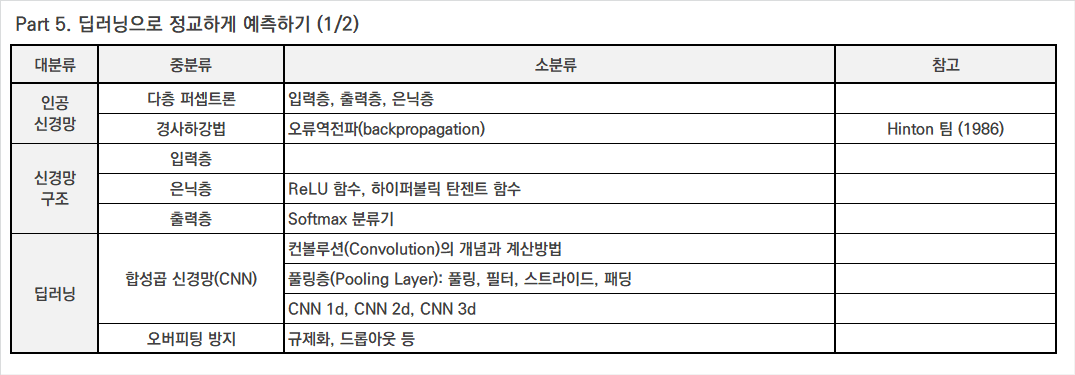

## <b> Ch 2. 어서와, 인공신경망은 처음이지? </b>

### 인공신경망(뉴럴 네트워크) 개념 소개

- 다층 퍼센트론(Multi-Layer Perceptron)
  - 입력층 하나와 <b>은닉층</b>(Hidden Layer)이라 불리는 하나 이상의 층과 출력층으로 구성
  - 출력층을 제외하고 모든 층은 편향 뉴런을 포함하여 다음층과 완전히 연결
  - 인공신경망의 은닉층이 2개 이상일 때 심층 신경망(DNN)이라 부른다
- 역전파(Backpropagation)
  - 다층 퍼센트론을 효율적으로 학습시킬 수 있는 알고리즘
  - 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고(정방향), 오차를 측정하고, 그 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정(역방향)
  - 이 오차가 감소하도록 가중치(weight)를 조금씩 조정 <-- 경사하강법

### 기본 구조(1): 입력층, 은닉층, 출력층
- 입력층
- 은닉층
  - 데이터의 입출력 과정에서 직접 보이진 않지만 숨겨진 특징을 학습하는 역할
- 출력층


### 기본 구조(2): Activation Function
활성화 함수
- 딥러닝 네트워크에서는 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고 주로 비선형 함수를 통과시킨 후 전달한다
- 이때 사용하는 함수를 활성화 함수(Activation Function) 이라 부른다

은닉층 
- 하이퍼볼릭 탄젠트 함수: <b>tanh</b>(𝒵) = 2σ(2 𝒵) - 1. 
  - 시그모이드(Sigmoid) 함수를 보완
  - 출력범위가 -1 ~ 1 사이이기 때문에 훈련 초기에 각 층의 출력이 다소 정규화되는 경향(원점 주의로 몰리게 되는 경향)
- ReLU (Rectified Linear Unit) 함수: <b>ReLU</b>(𝒵) = max(0, 𝒵)
  - 계산속도가 빠르다는 장점, 출력에 최댓값이 없기 때문에 경사하강법의 문제를 완화(편평한 지역에서 심하게 지체되지 않는다)
  - 과거에는 Sigmoid 함수를 많이 사용했지만 최근에는 ReLU가 딥러닝에 더 적합하다고 알려져 많이 쓰이는 추세
  - Sigmoid 함수와 tanh 함수는 입력값 x가 너무 커지거나 너무 작아지면 그래프의 미분값(기울기)이 0이 되는 문제가 발생하는데, ReLU는 입력값 x가 0보다 작으면 미분값이 0이이지만 0보다 클 경우 입력값이 아무리 커져도 미분값이 1인 상태가 유지되기 때문에 Vanishing Gradient 가 발생할 확률이 적다
  - "Dying Neuron" 현상

출력층
- <b>소프트맥스 활성화 함수</b>
  - input값을 [0,1] 사이의 값으로 모두 정규화하여 출력하며, 출력값들의 총합은 항상 1이 되는 특성을 가진 함수
  - 다중분류에 사용: 2개 클래스 대상으로 정의하던 logit을 K개의 클래스를 대상으로 일반화하면 softmax함수가 된다

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdT8rQW%2FbtrgbznmV0T%2Ffhk6kjmMKzTZayn6172Wf0%2Fimg.png">

<img src="https://mlnotebook.github.io/img/transferFunctions/tanh.png" width="500"> 
<img src="https://mlnotebook.github.io/img/transferFunctions/dtanh.png" width="500"> 

<img src = "https://mlnotebook.github.io/img/transferFunctions/relu.png" width="500">

![image.png](https://miro.medium.com/max/666/1*nrxtwp6rzqdFhgYh0x-eVw.png)

### 기본 구조(3): 손실함수, 경사하강법, Optimizer

손실함수(Loss Function)
- 측정한 데이터를 토대로 산출한 모델의 예측값과 실제값의 차이를 표현하는 지표
  - MSE(Mean Squared Error) 
  - 크로스 엔트로피 (Cross-Entropy)

Optimizer
  - 손실함수의 값이 최대한 작아지도록 모델 파라미터들을 조정
  - 손실함수를 줄여나가면서 학습하는 방법은 어떤 optimizer를 사용하느냐에 따라 달라진다
    - Adam Optimizer

경사하강법(Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절댓값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복
- Local Minima

Learning Rate (epsilon)

### 인공신경망 응용 사례

In [2]:
import tensorflow as tf

In [3]:
# Load MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Change image data type to float32
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# Reshape: Flatten 28 * 28 to 784D (reshape)
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# Normalize Input : [0, 255] -->  [0, 1] 
x_train, x_test = x_train / 255., x_test / 255.
# One-hot encoding Labels
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

In [4]:
# Define params.
learning_rate = 0.001 # 학습률
num_epochs = 30       # 학습횟수
batch_size = 256      # 배치개수
display_step = 1      # 손실함수 출력 주기
input_size = 784      # 28 * 28
hidden1_size = 256
hidden2_size = 256
output_size = 10

In [5]:
# Shuffle data 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

In [6]:
# Define ANN network
class ANN(object):
  # Define tf.Variable
  def __init__(self):
    self.W1 = tf.Variable(tf.random.normal(shape=[input_size, hidden1_size]))
    self.b1 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W2 = tf.Variable(tf.random.normal(shape=[hidden1_size, hidden2_size]))
    self.b2 = tf.Variable(tf.random.normal(shape=[hidden2_size]))
    self.W_output = tf.Variable(tf.random.normal(shape=[hidden2_size, output_size]))
    self.b_output = tf.Variable(tf.random.normal(shape=[output_size]))

  def __call__(self, x):
    H1_output = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
    H2_output = tf.nn.relu(tf.matmul(H1_output, self.W2) + self.b2)
    logits = tf.matmul(H2_output, self.W_output) + self.b_output

    return logits

In [7]:
# Define  Loss function: Cross-entropy
@tf.function
def cross_entropy_loss(logits, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [8]:
# Define Optimizer: Adam
optimizer = tf.optimizers.Adam(learning_rate)

In [9]:
# Define function for optimization
@tf.function
def train_step(model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))

In [10]:
# Define function for model accuracy
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

In [11]:
# Start ANN model 
ANN_model = ANN()

# Model Optimization
for epoch in range(num_epochs):
  average_loss = 0.
  total_batch = int(x_train.shape[0] / batch_size)
  # Optimize for every batch
  for batch_x, batch_y in train_data:
    # Update params. 
    _, current_loss = train_step(ANN_model, batch_x, batch_y), cross_entropy_loss(ANN_model(batch_x), batch_y)
    # Compute average loss
    average_loss += current_loss / total_batch
  # Display every epoch
  if epoch % display_step == 0:
    print("Epoch: %d, Loss: %f" % ((epoch+1), average_loss))

# Print Test Accuracy
print("Accuracy: %f" % compute_accuracy(ANN_model(x_test), y_test))  

Epoch: 1, Loss: 233.592133
Epoch: 2, Loss: 57.188110
Epoch: 3, Loss: 36.902946
Epoch: 4, Loss: 27.017151
Epoch: 5, Loss: 20.836912
Epoch: 6, Loss: 16.465382
Epoch: 7, Loss: 13.329102
Epoch: 8, Loss: 10.931297
Epoch: 9, Loss: 8.941642
Epoch: 10, Loss: 7.313056
Epoch: 11, Loss: 6.048688
Epoch: 12, Loss: 4.930546
Epoch: 13, Loss: 4.056497
Epoch: 14, Loss: 3.276991
Epoch: 15, Loss: 2.633132
Epoch: 16, Loss: 2.150622
Epoch: 17, Loss: 1.696424
Epoch: 18, Loss: 1.358210
Epoch: 19, Loss: 1.097383
Epoch: 20, Loss: 0.830216
Epoch: 21, Loss: 0.662206
Epoch: 22, Loss: 0.507759
Epoch: 23, Loss: 0.417996
Epoch: 24, Loss: 0.272799
Epoch: 25, Loss: 0.227321
Epoch: 26, Loss: 0.172359
Epoch: 27, Loss: 0.157485
Epoch: 28, Loss: 0.131133
Epoch: 29, Loss: 0.097351
Epoch: 30, Loss: 0.070358
Accuracy: 0.943300


In [12]:
import tensorflow as tf

# Load MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Change image data type to float32
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# Reshape: Flatten 28 * 28 to 784D (reshape)
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# Normalize Input : [0, 255] -->  [0, 1] 
x_train, x_test = x_train / 255., x_test / 255.
# One-hot encoding of Label data
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

# Define params.
learning_rate = 0.001 # 학습율
num_epochs = 30       # 학습횟수
batch_size = 256      # 배치개수
display_step = 1      # 손실함수 출력 주기
input_size = 784      # 28 * 28
hidden1_size = 256
hidden2_size = 256
output_size = 10

# Shuffle data 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

# Define ANN network
class ANN(object):
  # Define tf.Variable
  def __init__(self):
    self.W1 = tf.Variable(tf.random.normal(shape=[input_size, hidden1_size]))
    self.b1 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W2 = tf.Variable(tf.random.normal(shape=[hidden1_size, hidden2_size]))
    self.b2 = tf.Variable(tf.random.normal(shape=[hidden2_size]))
    self.W_output = tf.Variable(tf.random.normal(shape=[hidden2_size, output_size]))
    self.b_output = tf.Variable(tf.random.normal(shape=[output_size]))

  def __call__(self, x):
    H1_output = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
    H2_output = tf.nn.relu(tf.matmul(H1_output, self.W2) + self.b2)
    logits = tf.matmul(H2_output, self.W_output) + self.b_output

    return logits

# Define  Loss function: Cross-entropy
@tf.function
def cross_entropy_loss(logits, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# Define Optimizer: Adam
optimizer = tf.optimizers.Adam(learning_rate)

# Define function for optimization
@tf.function
def train_step(model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))

# Define function for model accuracy
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

# Start ANN model 
ANN_model = ANN()

# Model Optimization
for epoch in range(num_epochs):
  average_loss = 0.
  total_batch = int(x_train.shape[0] / batch_size)
  # Optimize for every batch
  for batch_x, batch_y in train_data:
    # Update params. 
    _, current_loss = train_step(ANN_model, batch_x, batch_y), cross_entropy_loss(ANN_model(batch_x), batch_y)
    # Compute average loss
    average_loss += current_loss / total_batch
  # Display every epoch
  if epoch % display_step == 0:
    print("Epoch: %d, Loss: %f" % ((epoch+1), average_loss))

# Print Test Accuracy
print("Accuracy: %f" % compute_accuracy(ANN_model(x_test), y_test))  

Epoch: 1, Loss: 232.489136
Epoch: 2, Loss: 55.896984
Epoch: 3, Loss: 36.652275
Epoch: 4, Loss: 26.945723
Epoch: 5, Loss: 20.868710
Epoch: 6, Loss: 16.524008
Epoch: 7, Loss: 13.318645
Epoch: 8, Loss: 10.864092
Epoch: 9, Loss: 8.919512
Epoch: 10, Loss: 7.264729
Epoch: 11, Loss: 5.930723
Epoch: 12, Loss: 4.872112
Epoch: 13, Loss: 3.919834
Epoch: 14, Loss: 3.169954
Epoch: 15, Loss: 2.589010
Epoch: 16, Loss: 2.068925
Epoch: 17, Loss: 1.670331
Epoch: 18, Loss: 1.308845
Epoch: 19, Loss: 1.023218
Epoch: 20, Loss: 0.790740
Epoch: 21, Loss: 0.630354
Epoch: 22, Loss: 0.455355
Epoch: 23, Loss: 0.374337
Epoch: 24, Loss: 0.292358
Epoch: 25, Loss: 0.217526
Epoch: 26, Loss: 0.147021
Epoch: 27, Loss: 0.124867
Epoch: 28, Loss: 0.115166
Epoch: 29, Loss: 0.095451
Epoch: 30, Loss: 0.060371
Accuracy: 0.940400


## <b> Ch 3. 심층신경망(Deep Neural Network) </b>

### 기존 뉴럴네트워크 모델의 단점
- 계산비용, 계산인프라의 부족
- 오차 역전파
  - Learning Represntations by Back-propagating Errors (1986)

### 합성곱 신경망(CNN)

컨볼루션 신경망
- 이미지 분야를 다루기에 최적화된 신경망 구조
- 컨볼루션층(Convolution Layer)
  - 컨볼루션 연산을 통하여 이미지의 특징을 추출하는 역할
- 컨볼루션(합성곱)이란?
  - 커널(kernel) 또는 필터(filter)라 불리는 윈도우 사이즈만큼의 X*X 크기의 행렬을 Y * Y 크기의 부분과 곱해서 모두 더하는 연산
  - 행렬곱의 결과로 이미지 행렬의 X * X 크기 부분의 값들은 모두 더해져 하나의 값으로 모아짐
  - 이 행렬곱을 Y * Y 크기의 이미지 행렬의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 수행하는 연산

- 컨볼루션층(Convolution Layer)과 풀링층(Pooling Layer)
두 종류 층을 포함하는 순방향 신경망(Feed-forward
Neural Networks)
- 전처리 과정을 추가한 다층 퍼셉트론의 한 종류로 2차원 데이터의 입력과 훈련에 용이하고 적은 매개변수만이 필요하다는 장점
- 컨볼루션층(Convolutional Layer)과 풀링층(Pooling Layer), 완전연결층(Fully-Connected Layer)으로 구성되어 있으며, 입력층 이후에 합성곱층과 풀링층이 반복되며 마지막 첫번째 또는 두번째 층에서 완전연결층으로 진행하도록 구성
- 이미지와 영상 및 음성 인식과 같은 분야에서 좋은 성능

![image.png](https://wikidocs.net/images/page/64066/conv4.png)

### CNN 기본 개념

- 풀링층(Pooling Layer) 
  - 풀링 or 서브샘플링
  - 차원을 축소하는 역할
  - 이미지의 X * X 크기 부분에서 가장 큰 값 하나를 추출해서 원본 이미지의 X * X개의 값을 1개의 값으로 축소
  - Max Pooling, Average Pooling, Min Pooling
  - 컨볼루션에서는 주로 Max Pooling 이용

- 스트라이드: 건너뛰는 정도

- 패딩(Padding)
  - 컨볼루션 레이어에서 필터와 스트라이드를 적용하여 나오게 되는 Feature Map의 크기는 입력 데이터보다 작게 됨
  - 이 때 컨볼루션 레이어의 출력 데이터가 줄어드는 것을 방지하는 방법이 패딩
  - 입력 데이터의 외곽에 지정된 픽셀만큼 특정값으로 채워넣는 것을 의미
  - 제로패딩: 풀링을 거친 값의 차원이 정수로 나누어 떨어지지 않을 수도 있기 때문에 인풋 이미지의 상하좌우 모서리에 0을 채워줌

- 채널
  - 흑백 이미지는 채널이 1개지만, 컬러 이미지는 채널이 3개(R, G, B)

![image.png](https://taewanmerepo.github.io/2018/01/cnn/head.png)

### CNN 1d, 2d, 3d

- 1D CNN
  - 이미지가 아닌 시계열 분석 (time-series analysis)나 텍스트 분석을 하는데 주로 많이 사용된다 
  - 합성곱을 위한 커널과 적용하는 데이터의 sequence가 1차원의 모양을 가짐
  - 컨볼루션이 움직이는 방향이 한 방향이기 때문에 1D로 이해해도 무방함
  - 2D CNN의 입출력 데이터는 3차원이었듯이, 1D CNN의 입출력 데이터는 2차원

- 3D CNN
  - 3D CNN의 입출력 데이터는 4차원이며 주로 3D 이미지 데이터 (MRI, CT 스캔) 분석에 사용

## <b> Ch 4. CNN 분류모형 예시</b>

### <b> 텐서플로의 간단한 소개</b> 
- 텐서(tensor): 행렬로 표현할 수 있는 2차원 형태의 배열을 높은 차원으로 확장한 다차원 배열
- 텐서플로의 계산은 데이터 흐름 그래프(dataflow graph)로 이루어진다 
- 즉, 텐서 형태의 데이터들이 딥러닝 모델을 구성하는 연산들의 그래프를 따라  연산이 일어나기 때문에 텐서플로라는 이름이 붙은 것

- 텐서플로의 기능
  - 사전학습 모델 제공
  - 고수준(High-level) API 제공: 텐서보드 및 Keras와 같은 추상화 라이브러리 제공


### <b> 하이퍼 파라미터 소개</b> 

은닉층의 수와 유닛 수
- 보통 각 은닉층의 뉴런은 정규화 기술이 적용되어 모델의 정확도를 높이는데 기여
- 뉴런의 개수와 레이어의 깊이는 오버피팅 혹은 언더피팅에 영향을 주므로 적잘한 수의 층이 중요

<b> 가중치 초기화</b>(Initialization)
- 가장 이상적인 방법은 각 층에서 사용되는 Activation Function에 따라서 적절한 Weight 초기화 기법을 사용하는 것이 좋다
- ReLU, Leaky ReLU 등을 이용한다면 He 초기화(He Initialization)를 사용
- 초기화시 사용되는 난수는 uniform distribution을 주로 사용

학습률(Learning Rate)
- 딥러닝의 학습은 모델로부터 얻은 예측값(output 또는 y hat)과 기대값(desired output 또는 label)과의 차이를 계산하여 얻은 비용(cost) - 가중치(Weight, W) 간의 gradient를 이용하여 기존 Weight를 업데이트하는 방식으로 이루어진다
- 이 때 gradient를 얼만큼 이동할지를 정하는 것이 학습율(eps) 하이퍼 파라미터
  - 고정된 값을 이용할 수도 있고 학습을 진행하면서 값을 변화시킬 수도 있다("Learning Rate Decay")
- 학습율은 학습의 속도와 학습성과에 영향을 주기 때문에 적절한 설정이 필요
  - 너무 크다면 global minimum (또는 원하는 극값)에 도달하지 못할 수 있으며, 너무 작으면 학습시간이 오래 걸릴 수 있기 때문

모멘텀(Momentum)
- Gradient Descent에 대한 최적화 기법 중 하나로 global minimum에 도달하기 위해 학습하는 과정에서 가중치(W)를 업데이트하는데에 가속도를 주어 Weight가 감소하거나 증가하는 방향으로 더 많은 변화를 주는 것이다
- 모멘텀을 적용하는 이유는 학습횟수를 줄이고 효율화하기 위함

에폭(Epoch)
- 학습을 반복하는 횟수
- 모델이 전체 데이터 셋에 대하여 Feedforward와 Backpropagation을 거친 것을 의미
- 즉 에폭을 한번 거쳤으면 학습을 한번 완료했다는 뜻

배치 사이즈(Batch Size)
- 한번의 batch마다 주는 데이터 샘플 사이즈


### <b> 과대적합</b>(overfitting)<b>의 극복</b> 

<b> 규제화</b>(Regularization) 
- 규제화 즉 가중치 규제는 가중치의 값이 커지지 않도록 제한하는 기법
- 가중치를 규제하면 모델의 일반화(generalizability) 정도가 올라간다 --> 즉 오버피팅을 방지할 수 있게 됨
- 가중치의 크기를 제한하면, 모델이 소수의 데이터에 집착하지 않기 때문

- L1 규제: 손실함수에 가중치의 절대값인 L1 Norm을 추가한다
  - c.f.) Lasso: 회귀모형에 L1 규제 추가한 것
- L2 규제: 손실함수에 가중치에 대한 L2 Norm을 추가한다
- 주로 L2 규제를 많이 사용


<b> 드롭아웃</b>(Dropout)
- 은닉층의 뉴런을 일정 비율로 배제하고 학습
- 드롭아웃의 하이퍼파라미터는 제외할 뉴런의 비율이며, 이 값이 너무 낮으면 오버피팅 방지 효과가 크지 않은 반편 너무 높으면 언더피팅(과소적합)이 될 수 있다


### <b> 추가개념</b>: Batch Normalization, Early Stopping

<b>배치 정규화</b>(Batch Normalization)
- 뉴럴 네트워크의 깊이가 깊어질수록 학습이 안정적으로 되지 않는 문제가 발생
  - 은닉층을 많이 거칠수록 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상
  - 신경망의 활성함수의 도함수 값이 계속 곱해지다 보면 가중치에 따른 결과값의 기울기가 0에 가까워지게 됨
  - 역전파(Backpropagation) 알고리즘에서 입력층으로 진행할수록 기울기가 점차적으로 작아지다가 나중에는 거의 기울기의 변화가 없어지는 문제
- 이러한 불안정의 원인으로 "Internal Covariance Shift" 현상이 지목되기도 함
  - 딥러닝에서 각 층을 지나면서, inner representation의 distribution이 달라지는 현상 --> 층별로 입력 데이터 분포가 달라지는 현상 
  - 따라서 레이어(층)를 지날 때마다 변하는 분포의 scale을 맞춰준다면 안정된 학습을 보장할 수 있을 것

- 배치 정규화의 방법 
  - 데이터의 범위를 정한다(이 범위에 따라 batch normalization/ layer normalization이 나눠지기도 함)
  - 평균과 분산을 구한다
  - 표준화(zero mean, unit variance)
  - 추가로 scale과 shift를 추가해 분포를 조정할 수도 있다(affine transform)

- 배치 정규화는 각 층에 들어가는 입력의 평균과 분산을 정규화하여 학습을 효율화하기 때문에 <b>기울기 소실</b>이나 <b>폭주</b> 문제를 예방하기도 함




<b>조기종료</b>(Early Stopping)
- 모델이 과적합 되기 전 훈련을 멈추는 정규화 기법
- 훈련 중 주기적으로 성능 검증을 하다가 성능이 더 좋아지지 않으면 과적합이라 판단하고 훈련을 멈추게 됨
- 에폭(epoch) 단위로 성능 검증을 하며 epoch보다 자주 검증해야 할 때는 배치 실행 단위로 검증하기도 함
- c.f.) 조기종료는 파라미터 공간을 작게 만들기 때문에 L2 규제화와 동일한 효과
  - 예) 손실함수가 2차 함수로 정의되는 선형 모델

## <b> Ch 5. 딥러닝과 시계열</b>

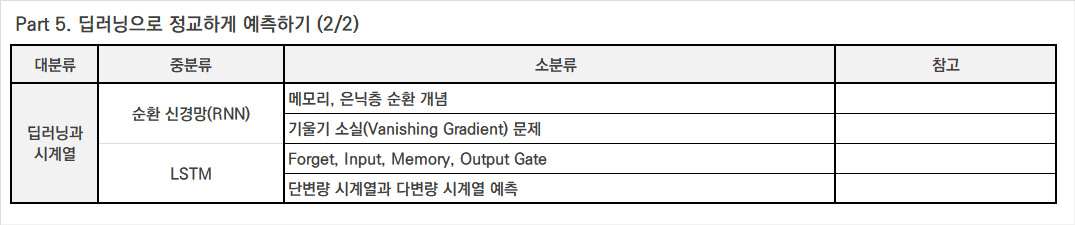"

#### <b>순환 신경망</b>(RNN)

순환 신경망(Recurrent Neural Network)
- 기본 인공신경망 구조에서 이전 시간(𝑡-1)의 은닉층의 출력값을 다음 시간(𝑡)의 은닉층의 입력값으로 다시 집어넣는 경로가 추가된 형태
- 현재 시간 𝑡 의 결과가 다음 시간 𝑡+1에 영향을 미치고, 다시 다음 시간 𝑡+2에 영향을 미치는 과정이 끊임없이 반복
- 순환신경망은 자연어 처리 문제에 주로 사용되며 시계열 데이터를 다루기에 좋다
- 예) 주식가격, 파형으로 표현되는 음성데이터, 앞뒤 문맥을 가진 단어들의 집합으로 표현되는 자연어 데이터

#### <b>RNN과 시계열</b>


#### <b>장단기 기억 네트워크</b>(Long Short-Term Memory, LSTM)


<b>RNN의 기울기 소실</b>(Vanishing Gradient) <b>문제</b>

- 𝑡₁에서 입력받은 데이터는 𝑡₁에서 RNN의 파라미터를 업데이트 하거나 예측을 진행하는데 강한 영향력(큰 경사도)을 미침
- 하지만 𝑡₂, 𝑡₃, ... 계속해서 새로운 데이터가 들어오면서 새로 들어온 인풋의 영향력에 덮여 𝑡₁데이터의 영향력은 조금씩 사라지게 됨

- RNN이 <b>장기기억력을 가지지 못한다는 단점</b>
  - 현재 시간에서 가까운 시간의 데이터만 고려해서 모델링한다면 장기간의 시간 고려가 필요할 때 성능이 감소하게 됨

<b>LSTM 구조</b>

- 4개의 게이트(gate) 
  - (1) Forget Gate: 과거 정보를 버릴지 결정
  - (2) Input Gate: 저장된 정보가 이동 
  - (3) Memory Cell: 현재 정보를 저장할 지 결정
  - (4) Output Gate: 어떤 값을 출력할지 결정

## <b>Ch 6. 딥러닝을 이용한 시계열 예측</b>

### 데이터 소개

In [2]:
# Jena Climate is weather timeseries dataset recorded at the Weather Station of the Max Planck Institute for Biogeochemistry in Jena, Germany.

In [3]:
# Jena Climate dataset is made up of 14 different quantities (such air temperature, atmospheric pressure, humidity, wind direction, and so on) were recorded every 10 minutes, over several years.
# This dataset covers data from January 1st 2009 to December 31st 2016.

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

zip_path = tf.keras.utils.get_file(
  origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
  fname='jena_climate_2009_2016.csv.zip',
  extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 5s 0us/step


In [4]:
df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)   
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3  \
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)   
0          3.33          3.11          0.22       1.94             3.12  \
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [5]:
df.head(15)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [6]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


### 뉴럴 네트워크를 이용한 기상예측

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [8]:
# Define a specific window for training Neural Network
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [9]:
TRAIN_SPLIT = 300000 ## about 2083 days
tf.random.set_seed(13) ##

In [10]:
# Extract temperature (degree) data & Make univariate series
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
print(uni_data.head())

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64


In [11]:
# Standardization
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data - uni_train_mean) / uni_train_std  # Standardization

print(uni_data)

[-1.99766294 -2.04281897 -2.05439744 ... -1.43494935 -1.55883897
 -1.62715193]


In [12]:
univariate_past_history = 20
univariate_future_target = 0

## univariate_data 함수 이용
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                         univariate_past_history,
                                         univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                     univariate_past_history,
                                     univariate_future_target)

print('Single window of past history')
print(x_train_uni[0])
print('\n Target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
-2.1041848598100876


In [13]:
# Defind function for Visualization
def create_time_steps(length):
    return list(range(-length, 0))


def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

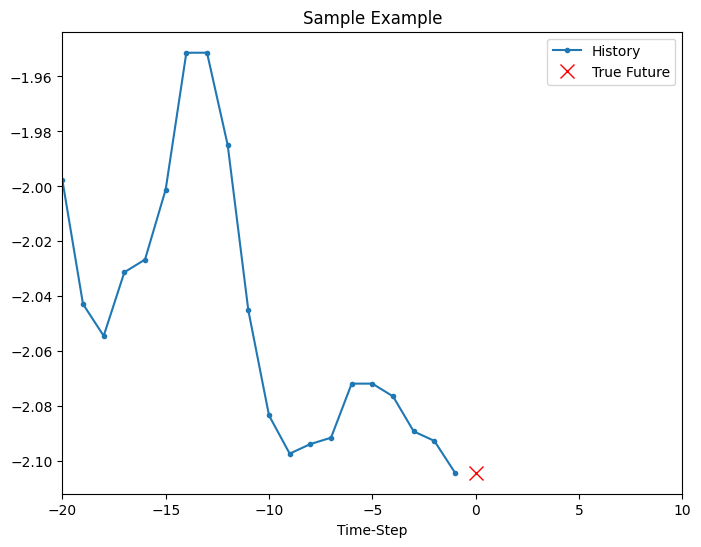

In [14]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example').show()

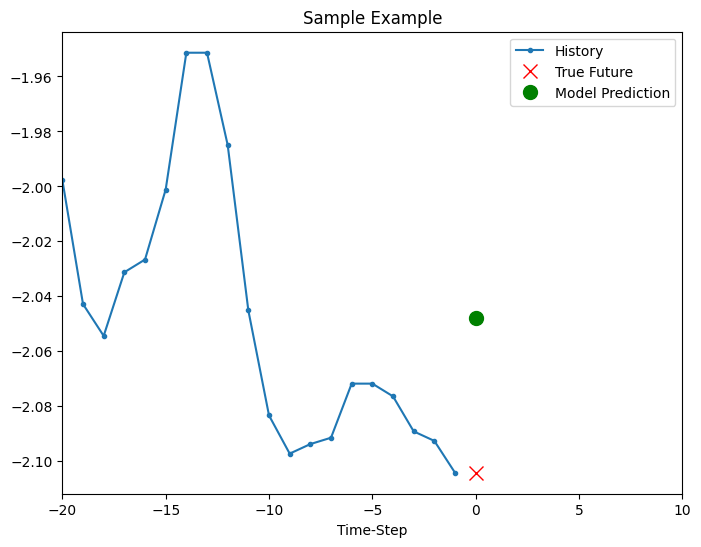

In [15]:
def baseline(history):
    return np.mean(history)

show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'Sample Example').show()

### LSTM을 이용한 기상예측: 단변량

In [16]:
# shuffle, batch, cache

In [17]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [18]:
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [19]:
# LSTM (Long Short Term Memory)

In [20]:
np.array(x_train_uni).shape[-2:]

(20, 1)

In [21]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=np.array(x_train_uni).shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [22]:
# Train model

In [23]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 5s 10ms/step - loss: 0.1586 - val_loss: 0.0432
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0462 - val_loss: 0.0255
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0336 - val_loss: 0.0221
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0301 - val_loss: 0.0195
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0223 - val_loss: 0.0184
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0246 - val_loss: 0.0179
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0228 - val_loss: 0.0170
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0219 - val_loss: 0.0165
Epoch 9/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0216 - val_loss: 0.0161
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0198 - val_loss: 0.015

8/8 [==============================] - 0s 2ms/step


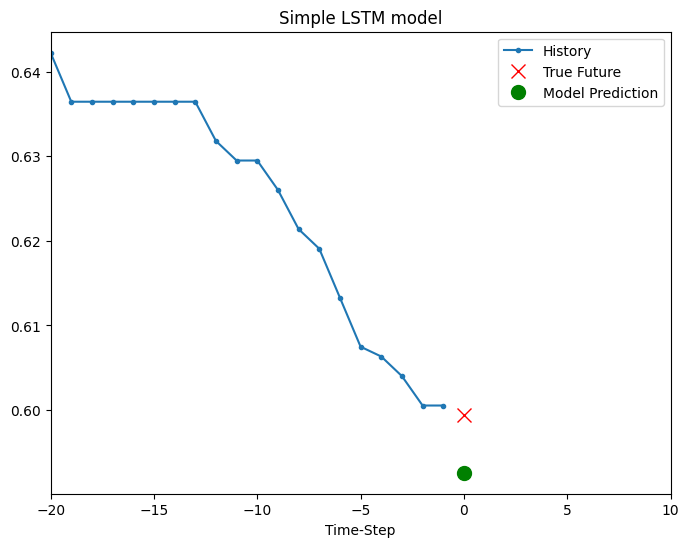

8/8 [==============================] - 0s 3ms/step


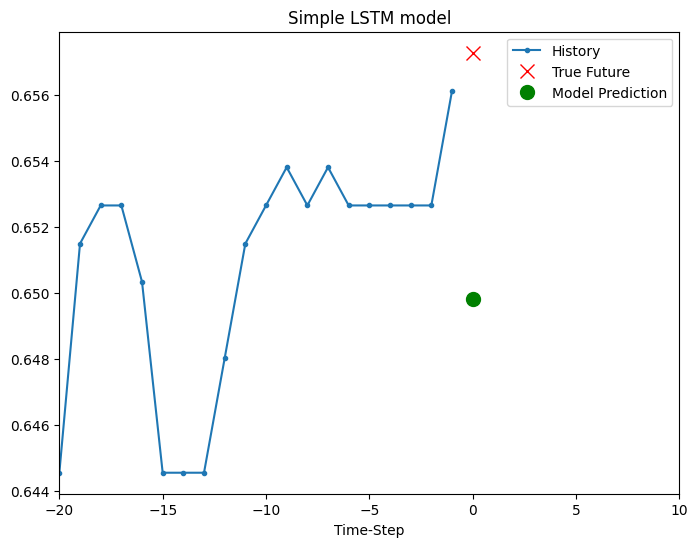

8/8 [==============================] - 0s 3ms/step


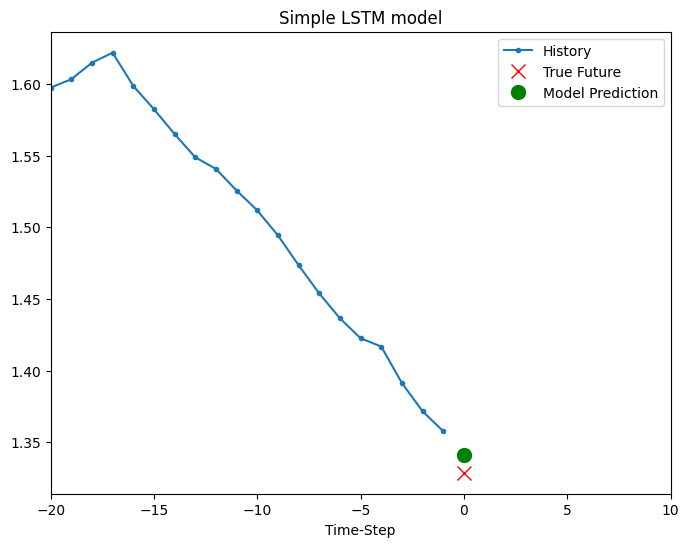

8/8 [==============================] - 0s 2ms/step


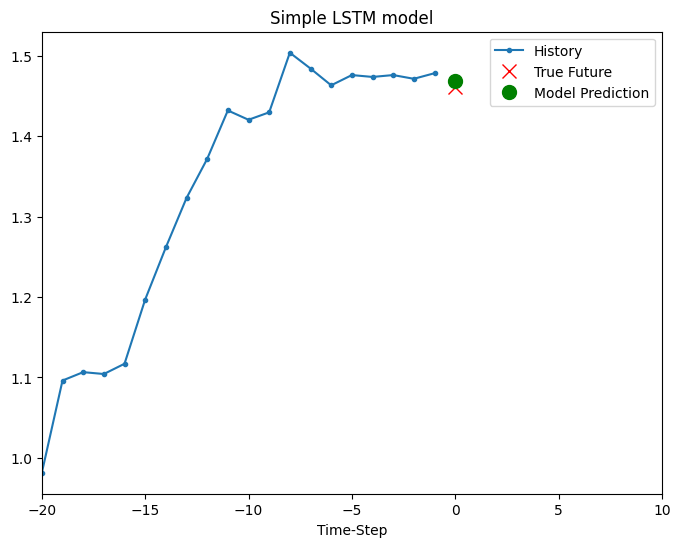

8/8 [==============================] - 0s 3ms/step


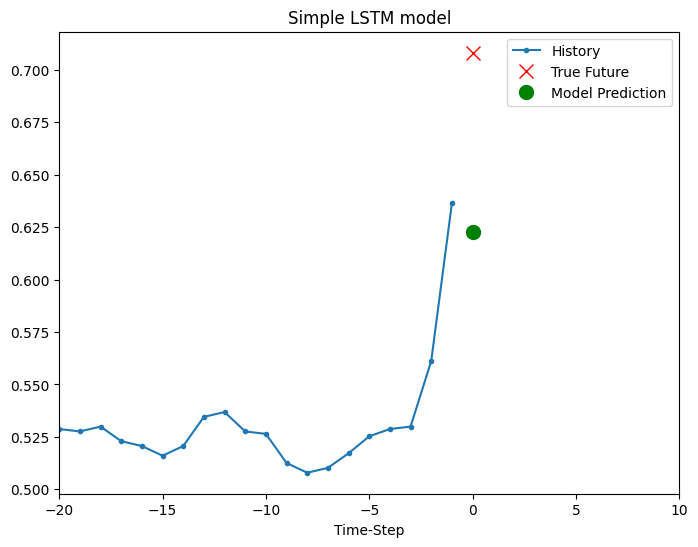

8/8 [==============================] - 0s 2ms/step


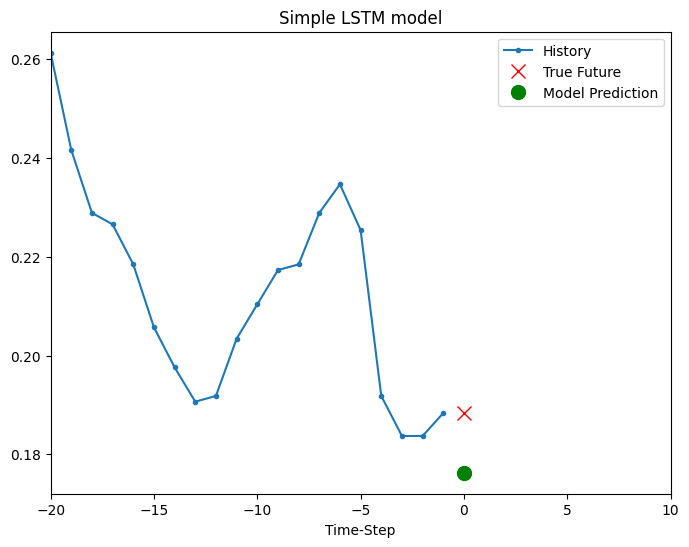

8/8 [==============================] - 0s 2ms/step


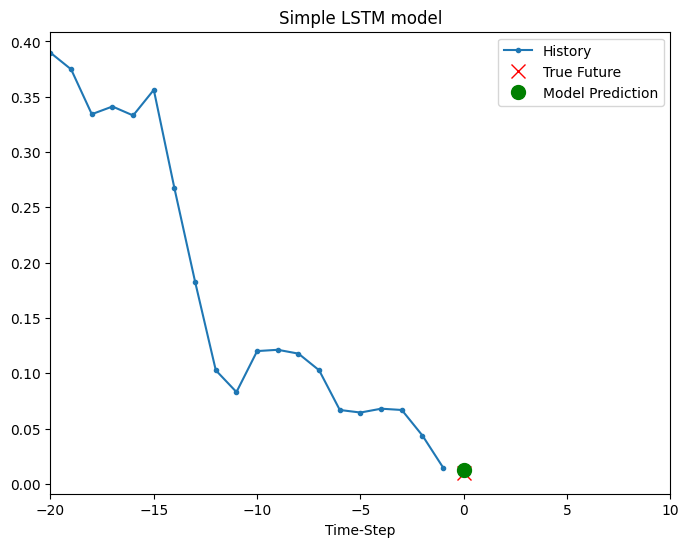

In [25]:
# Make forecasts & Visualize

for x, y in val_univariate.take(7):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

### LSTM을 이용한 기상예측: 다변량

In [24]:
# 다변량 시계열 데이터 예측하기

In [26]:
# 온도 (air temperature), 기압 (atmospheric pressure), 공기밀도 (air density)

In [27]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


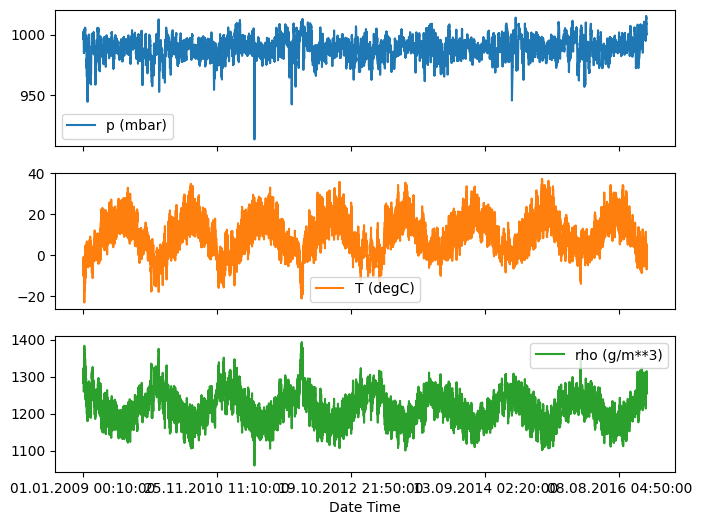

In [28]:
features.plot(subplots=True)
plt.show()

In [29]:
# Standardization

In [30]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std
print(dataset)

[[ 0.95547359 -1.99766294  2.2350791 ]
 [ 0.96154485 -2.04281897  2.28524007]
 [ 0.95668784 -2.05439744  2.29600633]
 ...
 [ 1.35617678 -1.43494935  1.76136375]
 [ 1.35496252 -1.55883897  1.88786728]
 [ 1.35617678 -1.62715193  1.95686921]]


In [31]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [32]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


8/8 [==============================] - 1s 9ms/step
(256, 1)
Epoch 1/10
200/200 [==============================] - 19s 83ms/step - loss: 0.3147 - val_loss: 0.2573
Epoch 2/10
200/200 [==============================] - 20s 101ms/step - loss: 0.2648 - val_loss: 0.2463
Epoch 3/10
200/200 [==============================] - 33s 163ms/step - loss: 0.2636 - val_loss: 0.2424
Epoch 4/10
200/200 [==============================] - 17s 83ms/step - loss: 0.2569 - val_loss: 0.2372
Epoch 5/10
200/200 [==============================] - 24s 121ms/step - loss: 0.2264 - val_loss: 0.2381
Epoch 6/10
200/200 [==============================] - 26s 132ms/step - loss: 0.2390 - val_loss: 0.2528
Epoch 7/10
200/200 [==============================] - 28s 138ms/step - loss: 0.2424 - val_loss: 0.2606
Epoch 8/10
200/200 [==============================] - 26s 132ms/step - loss: 0.2424 - val_loss: 0.2502
Epoch 9/10
200/200 [==============================] - 27s 133ms/step - loss: 0.2447 - val_loss: 0.2393
Epoch 10/10
200

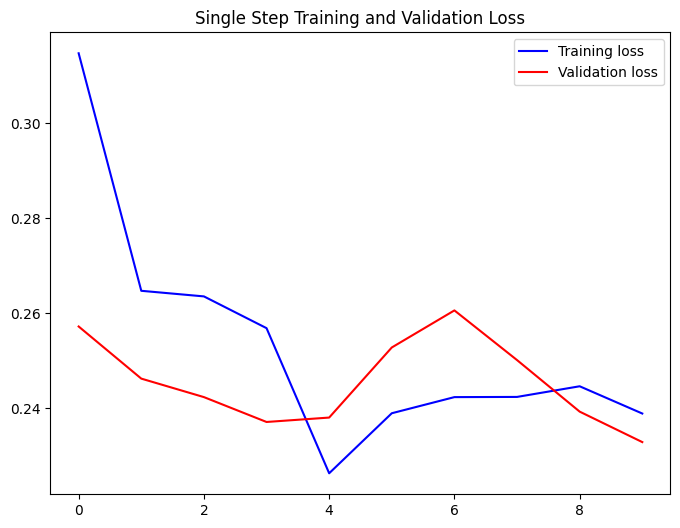

In [33]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)


def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

8/8 [==============================] - 0s 11ms/step


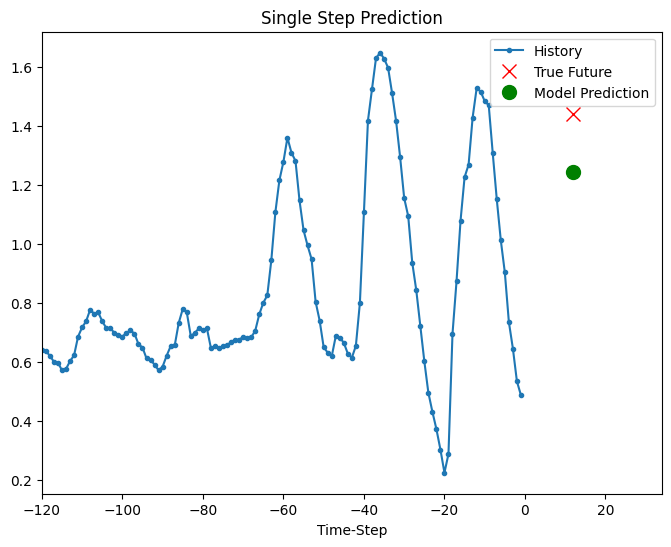

8/8 [==============================] - 0s 11ms/step


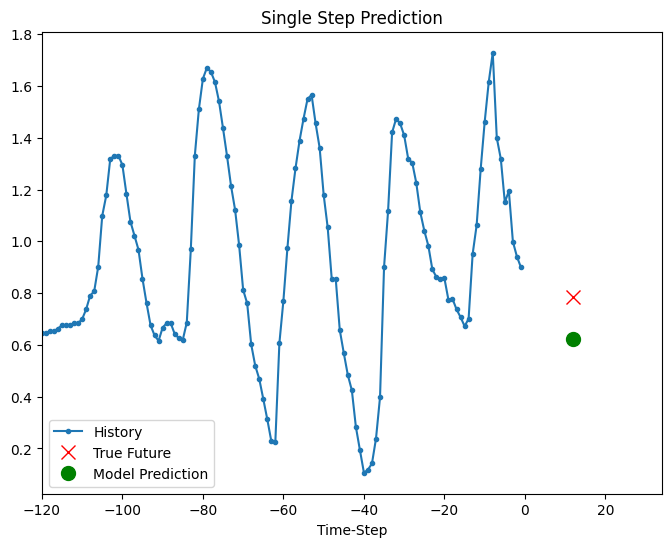

8/8 [==============================] - 0s 19ms/step


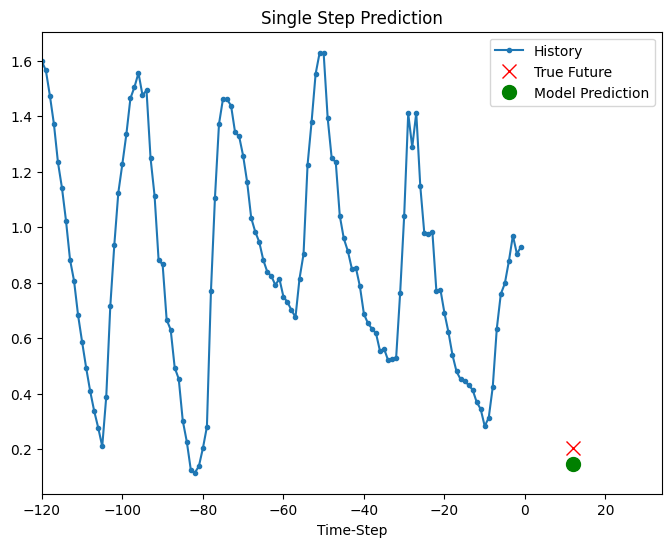

In [34]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plot.show()

In [35]:
past_history = 720
future_target = 72
STEP = 6

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history, future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history, future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


## <b> Ch 7. Part 5 요약 및 강의 총정리</b>

### 딥러닝과 시계열

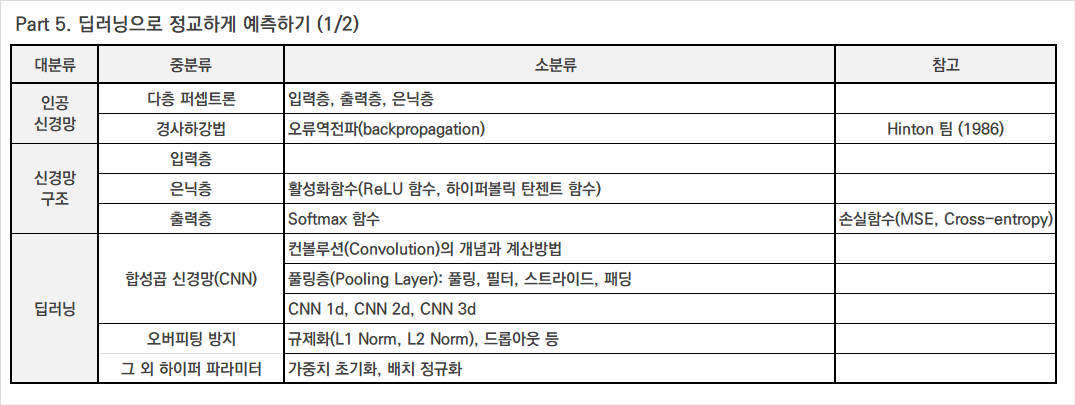

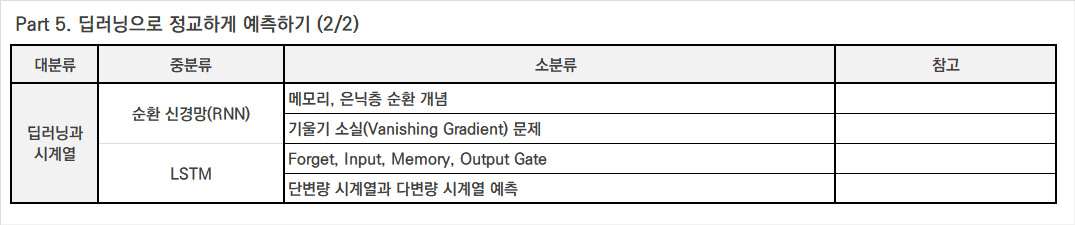

### 다음 파트: 다양한 시계열 방법론의 응용

- 데이터 다변화
- 도메인 다변화
- 방법론 다변화
- 실습 포트폴리오

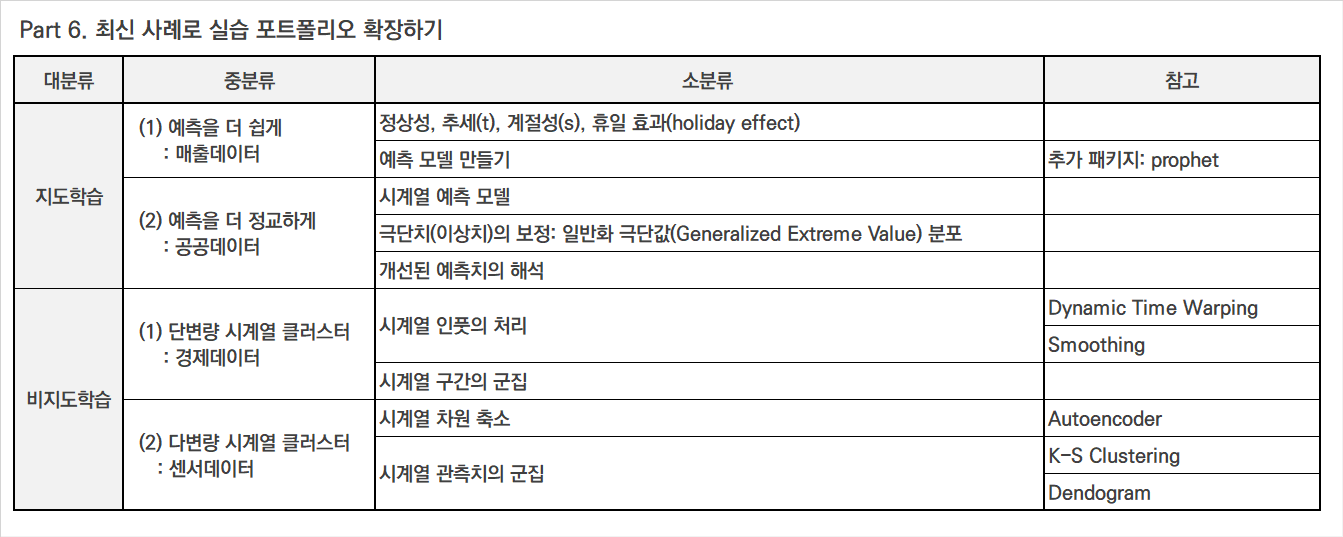

In [1]:
def ts_train_test(all_data, time_steps, for_periods): 
    """
    input:
     data: 날짜를 인덱스로 가지는 주식가격(Adj Close) 데이터
    output:
     X_train, y_train: 2013/1/1부터 2018-12/31까지의 데이터
     X_test : 2019년 동안의 데이터 
    time_steps: # input 데이터의 time steps
    for_periods: # output 데이터의 time steps
    """
    # training & test set 만들기
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)
    
    # training 데이터의 samples 와 time steps로 원본데이터 슬라이싱하기
    X_train = [] 
    y_train = [] 
    y_train_stacked = [] 
    for i in range(time_steps, ts_train_len - 1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # 3차원으로 재구성하기
    # np.reshape(samples, time steps, features) 로 만듦
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    
    # Preparing to creat X_test 
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    
    X_test = []
    for i in range(time_steps, ts_test_len+ time_steps- for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    
    return X_train, y_train, X_test 

In [2]:
X_train, y_train, X_test = ts_train_test(all_data,5,2)

# 3차원의 X_train을 데이터프레임 형식으로 바꿔서 눈으로 확인해보기
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

# 3차원의 X_test를 데이터프레임 형식으로 바꿔서 눈으로 확인해보기
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

NameError: name 'all_data' is not defined

In [4]:
def LSTM_model(X_train, y_train, X_test, sc):
    # 필요한 모듈 불러오기
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # LSTM 아키텍처 (architecture)
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units = 50, 
                           return_sequences = True, 
                           input_shape = (X_train.shape[1],1), 
                           activation = 'tanh'))
    my_LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model.add(Dense(units=2))
    
    # 컴파일링 (Compiling)
    my_LSTM_model.compile(optimizer = SGD(lr = 0.01, decay = 1e-7, 
                                         momentum = 0.9, nesterov = False),
                         loss = 'mean_squared_error')
    
    # training data 세트에 피팅하기 (fitting)
    my_LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)
    
    
    # X_test를 LSTM 모델에 넣어서 예측하기
    LSTM_prediction = my_LSTM_model.predict(X_test)
    
    
    # 스케일러에 예측값 넣어 반환하기
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)
    
    return my_LSTM_model, LSTM_prediction 

In [5]:
def LSTM_model(X_train, y_train, X_test, sc):
    # 필요한 모듈 불러오기
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # LSTM 아키텍처 (architecture)
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units = 50, 
                           return_sequences = True, 
                           input_shape = (X_train.shape[1],1), 
                           activation = 'tanh'))
    my_LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model.add(Dense(units=2))
    
    # 컴파일링 (Compiling)
    my_LSTM_model.compile(optimizer = SGD(lr = 0.01, decay = 1e-7, 
                                         momentum = 0.9, nesterov = False),
                         loss = 'mean_squared_error')
    
    # training data 세트에 피팅하기 (fitting)
    my_LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)
    
    
    # X_test를 LSTM 모델에 넣어서 예측하기
    LSTM_prediction = my_LSTM_model.predict(X_test)
    
    
    # 스케일러에 예측값 넣어 반환하기
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)
    
    return my_LSTM_model, LSTM_prediction 

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)

NameError: name 'X_train' is not defined

In [6]:
y_pred = pd.DataFrame(LSTM_prediction[:, 0])
y_test=all_data.loc['2019':,'Adj Close'][0:len(LSTM_prediction)]
y_test.reset_index(drop=True, inplace=True)

NameError: name 'pd' is not defined

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, RMSLE, R2],
                         index = ['MAE','RMSE', 'RMSLE', 'R2'],
                         columns=['Results'])
    return Result
